In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from gaussxw import gaussxw


# Folha 2

Ex. 6

In [ ]:
def LogisticMap(r,x,N):
    R = np.zeros((N))+r
    X = np.zeros((N))+x
    for i in range(N-1):
        X[i+1] = X[i]*r*(1-X[i])
    return R,X

In [ ]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
N = 1000
Rf = np.zeros((301,N))
Xf = np.zeros((301,N))
for i in range(100,401):
    R, X = LogisticMap(i/100,0.5,N)
    Rf[i-100,:], Xf[i-100,:] = R, X
    ax1.plot(R,X)
for i in range(500,N):
    ax2.plot(Rf[:,i],Xf[:,i])
plt.show()


Ex. 7

In [ ]:
def MandelbrotSet(N=1000,I=100):
    Re= np.linspace(-2,2,N)
    Plane = np.add.outer(Re,Re*1j)
    Z = np.zeros((N,N),dtype = np.clongdouble)
    Colors = np.zeros((N,N),int)
    for i in range(I):
        Z = Z**2+Plane
        Colors += np.array((abs(Z)>2),bool) + np.array((np.isnan(Z)))
    Colors = np.log(Colors+1)
    X, Y = np.meshgrid(Re,Re)

    plt.pcolormesh(X,Y,Colors,vmin = 0, vmax = np.log(I+1),cmap='hot')
    plt.show()

In [ ]:
MandelbrotSet()

# Folha 3

Ex. 2

In [ ]:
def SimpsonsRule(f,a,b,N):
    t, h = np.linspace(a,b,N, retstep=1)
    t0 = t[:-1]
    tf = t[1:]
    tm = (t0+tf)/2

    return np.sum((h*(f(t0)+4*f(tm)+f(tf)))/6, axis=0)


def TrapezoidalRule(f,a,b,N):
    t, h = np.linspace(a,b,N, retstep=1)
    return np.sum((h*(f(t[:-1])+f(t[:-1])))/2)



def f(x):
    return x**4 - 2*x + 1

In [ ]:
(SimpsonsRule(f,0,2,10**4)-4.4)/(TrapezoidalRule(f,0,2,10**4)-4.4)

Ex. 3

In [ ]:
def E(x):
    return np.exp(-x**2)

def plterf(min,max,N = 1000):
    fig, ax = plt.subplots()
    t = np.linspace(min,max,N)
    Y = SimpsonsRule(E,0,t,100)
    ax.plot(t,Y)
    ax.grid()
    plt.show()

In [ ]:
SimpsonsRule(E,0,3,30)

In [ ]:
plterf(-3,3)

Ex. 4.1

In [ ]:
def J(m,x,N):
    Jintegrand = lambda t: np.cos(m*t-x*np.sin(t))
    return SimpsonsRule(Jintegrand,np.zeros((x.shape)),np.pi,100)/np.pi

def pltJ(m_min = 0,m_max = 2,x_min = 0,x_max = 20,N = 1000):
    fig, ax = plt.subplots()
    X = np.linspace(x_min,x_max,N)
    for i in range(m_min,m_max+1):
        Y = J(i,X,N)
        ax.plot(X,Y,label = "$J_{%i}$" % i)
    ax.legend(fontsize=14)
    plt.show()
        


In [ ]:
pltJ()

Ex. 4.2

In [ ]:
def LightIntensity(l,r,N):
    T = np.linspace(0, 2*np.pi,N)
    R = np.linspace(0, r, N)
    x = np.outer(R, np.cos(T))
    y = np.outer(R, np.sin(T))
    KR = 2*np.pi*np.sqrt(x**2+y**2)/l
    I = (J(1,KR,N)/KR)**2
    I[0,:] = np.zeros(N)+0.5 #lim (J1(x)/x)=1/2
    
    T, R = np.meshgrid(T,R)

    fig = plt.figure() 
    ax = fig.add_subplot(projection = "polar")
    dens = ax.pcolormesh(T,R,I,vmax = 0.01,cmap='gray')
    plt.colorbar(dens)
    ax.grid(False)
    ax.axis(False)
    plt.show()

In [ ]:
LightIntensity(500e-9,1e-6,1000)

Ex. 6 + 7

In [3]:
def TrapezoidalAdaptative(a,b,emin,f):
    e = np.inf
    h = (b-a)
    I0 = ((f(a)+f(b))*h)/2
    n = 1
    print("n\tI\te")
    print(n,"\t",I0,"\t---")
    while e > emin/10:
        N = 2*n+1
        t,h = np.linspace(a,b,N,retstep=1)
        I = I0 / 2 + np.sum(f(t[1:-1:2]))*h
        e = abs(I-I0)/3
        n *= 2
        print(n,"\t",I,"\t",e)
        I0 = I
    
    return I

def RombergTable(a,b,emin,f):
    e = np.inf
    h = (b-a)
    N = int(np.power(h/emin,1/4))
    R = np.zeros((N,N))
    R[0, 0] = ((f(a)+f(b))*h)/2
    n = 1
    i = 1
    print("1  | ",R[0,0])
    while e > emin/10:
        Points = 2*n+1
        t,h = np.linspace(a,b,Points,retstep=1)
        R[i, 0] = R[i-1, 0] / 2 + np.sum(f(t[1:-1:2]))*h
        print(i+1," | ",R[i,0],"\t",end="")
        for m in range(i):
            R[i, m+1] = R[i, m] + (R[i, m]-R[i-1, m])/(4**(m+1) - 1)
            print(R[i,m+1],"\t",end="")
        print()
        e = abs(R[i, i-1]-R[i-1, i-1])/(4**i-1)
        i += 1
        n *= 2



def SineSq(x):
    return np.sin(np.sqrt(100*x))**2



In [13]:
TrapezoidalAdaptative(0,1,10**-6,SineSq)

n	I	e
1 	 0.147979484546652 	---
2 	 0.3252319078064746 	 0.05908414108660753
4 	 0.5122828507233315 	 0.06235031430561896
8 	 0.4029974484782483 	 0.03642846741502772
16 	 0.430103369294747 	 0.009035306938832902
32 	 0.44841466578746997 	 0.0061037654975743165
64 	 0.4539129312153759 	 0.0018327551426353117
128 	 0.45534850437280217 	 0.000478524385808754
256 	 0.4557112664532411 	 0.00012092069347964991
512 	 0.45580219965166413 	 3.0311066141005167e-05
1024 	 0.4558249481324202 	 7.58282691868765e-06
2048 	 0.4558306362016461 	 1.8960230753021594e-06
4096 	 0.4558320582782708 	 4.7402554155991555e-07
8192 	 0.4558324138011344 	 1.1850762119773132e-07
16384 	 0.455832502682082 	 2.962698253394791e-08


0.455832502682082

In [14]:
RombergTable(0,1,10**-6,SineSq)

1  |  0.147979484546652
2  |  0.3252319078064746 	0.38431604889308213 	
3  |  0.5122828507233315 	0.5746331650289505 	0.5873209727713417 	
4  |  0.4029974484782483 	0.3665689810632206 	0.35269803546550527 	0.34897386185747614 	
5  |  0.430103369294747 	0.43913867623357994 	0.4439766559116039 	0.44542552290281184 	0.4458037647108328 	
6  |  0.44841466578746997 	0.45451843128504427 	0.4555437482884752 	0.45572735292937794 	0.45576775226281546 	0.455777492231097 	
7  |  0.4539129312153759 	0.4557456863580112 	0.4558275033628757 	0.4558320074116757 	0.45583241782141015 	0.45583248103309987 	0.45583249446137875 	


In [ ]:
%timeit -n 10 -r 20 TrapezoidalAdaptative(0,1,10**-6,SineSq)

In [ ]:
%timeit -n 10 -r 20 RombergTable(0,1,10**-6,SineSq)

Ex. 8

In [11]:
def SimpsonAdaptative(a,b,emin,f):
    e = np.inf
    S0 = (f(a)+f(b))/3
    T0 = 2*f((a+b)/2)/3
    I0 = (a-b)*(S0+2*T0)/2
    n = 2
    print("n\tI\te")
    print(n,"\t",I0,"\t---")
    while e > emin:
        N = 2*n+1

        S = S0+T0
        S0 = S
        
        t, h = np.linspace(a,b,N,retstep=1)
        T = 2*np.sum(f(t[1:-1:2]))/3
        T0 = T

        I = h*(S+2*T)
        e = abs(I-I0)/15

        I0 = I
        n *= 2
        print(n,"\t",I,"\t",e)
    return I

    

In [12]:
SimpsonAdaptative(0,1,10**-6,SineSq)

n	I	e
2 	 -0.38431604889308213 	---
4 	 0.5746331650289503 	 0.06392994759480217
8 	 0.36656898106322056 	 0.013870945597715319
16 	 0.4391386762335798 	 0.004837979678023951
32 	 0.45451843128504427 	 0.0010253170034309625
64 	 0.45574568635801116 	 8.181700486445954e-05
128 	 0.4558270287586109 	 5.422826706650655e-06
256 	 0.4558321871467207 	 3.4389254065144335e-07


0.4558321871467207

Ex. 9

In [183]:
def GaussianQuadrature(a,b,N,f):
    x, w = gaussxw(N)
    X = np.outer((b-a),x)/2 + np.outer((b+a),np.ones(x.shape))/2
    W = np.outer((b-a),w)/2
    print(X.shape)
    print(np.inner(f(X),W).shape)
    return np.diagonal(np.inner(f(X),W))

def cv(T,p=6.022e28,V=1000e-6,N=50):
    T = np.array(T)
    kB = 1.38e-23
    TD = 428
    Integrand = lambda x : x**4*np.exp(x)/(np.exp(x)-1)**2
    return 9*V*p*kB*(T/TD)**3*GaussianQuadrature(np.zeros(T.shape),TD/T,N,Integrand)


def plotfunc(a,b,N,f):
    X = np.linspace(a,b,N)
    Y = f(X)
    plt.plot(X,Y)

(1000, 50)
(1000, 50)


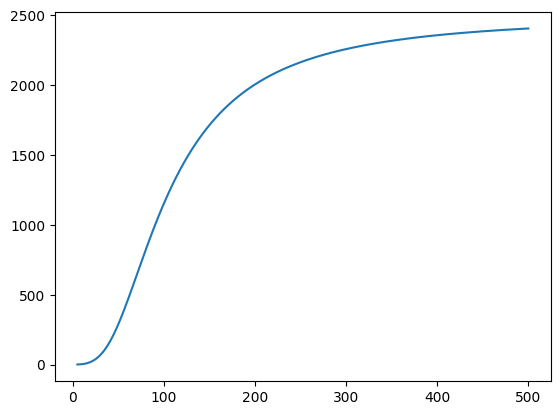

In [148]:
plotfunc(5,500,1000,cv)

$$\begin{align}
E = \frac{1}{2} m \left(\frac{\mathrm d x}{\mathrm d t}\right)^{2} + V(x)\\
\sqrt{\left(V(a)-V(x)\right)\frac{2}{m}} = \frac{\mathrm d x}{\mathrm d t}\\
\mathrm d t =\sqrt{\frac{m}{2 \left(V(a)-V(x)\right)}} \mathrm d x\\
\int_0^\frac{T}{4}\,\mathrm d t = \int_0^a \sqrt{\frac{m}{2 \left(V(a)-V(x)\right)}}\, \mathrm d x\\
\frac{T}{4} = \sqrt{\frac{m}{2}} \int_0^a \frac{\mathrm d x}{\sqrt{V(a)-V(x)}}\\
T =  \sqrt{8 m} \int_0^a \frac{\mathrm d x}{\sqrt{V(a)-V(x)}}
\end{align}$$

In [175]:
V = lambda x: x**4
def OscilatorPeriod(m,a,N,V):
    m = np.ones(a.shape)*m
    Va = np.resize(V(a),(a.size,N))
    return np.sqrt(8*m)*GaussianQuadrature(0,a,N,lambda x: 1/np.sqrt(Va-V(x)))



In [184]:
plotfunc(0,np.ones(20)*2,100,lambda a: OscilatorPeriod(1,a,20,V))

(20,)
(2000, 20)
(2000, 2000)


C:\Users\jose2\AppData\Local\Temp\ipykernel_17628\2453299001.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(8*m)*GaussianQuadrature(0,a,N,lambda x: 1/np.sqrt(Va-V(x)))
C:\Users\jose2\AppData\Local\Temp\ipykernel_17628\2453299001.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(8*m)*GaussianQuadrature(0,a,N,lambda x: 1/np.sqrt(Va-V(x)))


ValueError: operands could not be broadcast together with shapes (100,20) (2000,) 